



Epoch 1/5


938/938 [==============================] - 32s 31ms/step - loss: 0.1777 - accuracy: 0.9469 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0429 - val_accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9879
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0302 - accuracy: 0.9897
Test Accuracy: 0.9897000193595886
313/313 [==============================] - 3s 7ms/step


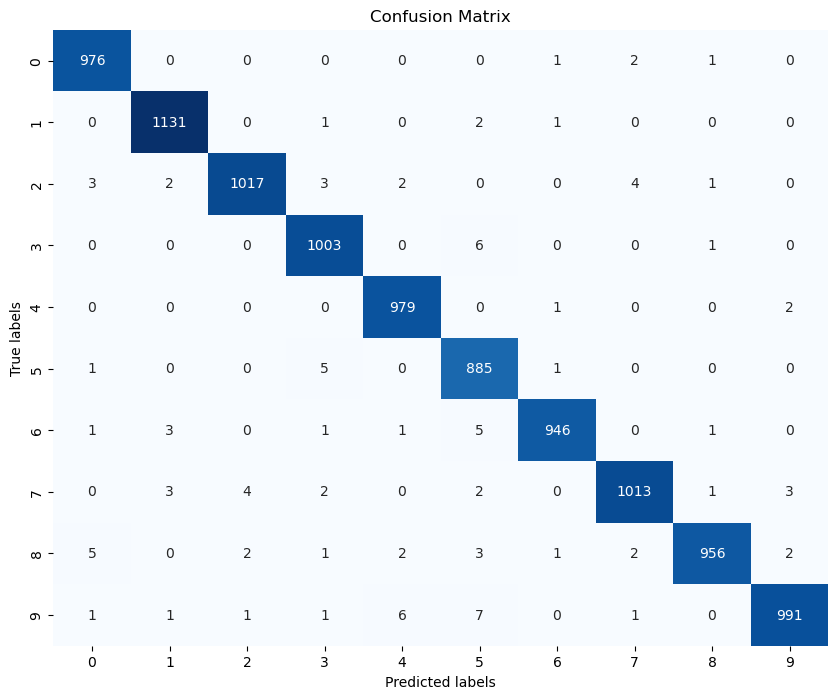

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist #Modified National Institute of Standards and Technology database
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix 
#It is a table that is used in classification problems to assess where errors in the model were made.
#The rows represent the actual classes the outcomes should have been. 
# #While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.
import seaborn as sns

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),#layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3).
    MaxPooling2D((2, 2)),#layer3 is the MaxPooling2D layer which picks the max value out of a matrix of size (3*3). 
    Conv2D(64, (3, 3), activation='relu'),#layer2 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3).
    MaxPooling2D((2, 2)),
    Flatten(),#layer5 is flattening the output obtained from layer4 and this flattens output is passed to layer6.
    Dense(250, activation='sigmoid'),#layer6 is a hidden layer of a neural network containing 250 neurons. 
    Dense(10, activation='softmax') #layer7 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.
])

model.compile(optimizer='adam', #Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. 
              #The method is really efficient when working with large problem involving a lot of data or parameters. 
              loss='categorical_crossentropy', #Categorical cross-entropy is a commonly used loss function in machine learning, 
              #particularly in classification tasks where the output variable is a categorical variable with two or more classes.
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
'''Multi Class Classifier :
Multiclass classification is a machine learning classification task that consists of more than two classes, or outputs

CNN:- 
A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. 
Computer vision is a field of Artificial Intelligence that enables a computer to understand and interpret the image or visual data. '''